In [1]:
"""Load Matplotlib and data wrangling libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
"""Import Data"""
df = pd.read_csv('ConstructionTimeSeriesDataV2.csv')

In [3]:
# From the Time Series Decomposition Assignment determine Moving averages for Public and Private Spending
df['MovAvgPrivate'] = np.NaN  # Creates an empty column for the Moving Average component data
df['MovAvgPublic'] = np.NaN  # Creates an empty column for the Moving Average component data

window = 12  # selected by best fit
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvgPrivate'] = (0.5*df.iloc[i - int(window/2)]['Private Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Private Construction'])/float(window)
for i in range(int(window/2),df.shape[0]-int(window/2)):
    df.loc[df.index[i],'MovAvgPublic'] = (0.5*df.iloc[i - int(window/2)]['Public Construction'] + df.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df.iloc[i + int(window/2)]['Public Construction'])/float(window)
    
# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
df.dropna(how='any',inplace=True)
df.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPrivate,MovAvgPublic
6,7,Jul-02,78863,58494,20369,52878.250000,17793.208333
7,8,Aug-02,79460,57953,21507,52892.625000,17791.291667
8,9,Sep-02,76542,55157,21385,52923.666667,17787.833333
9,10,Oct-02,75710,56023,19687,52945.000000,17802.291667
10,11,Nov-02,71362,53552,17810,52994.541667,17803.750000


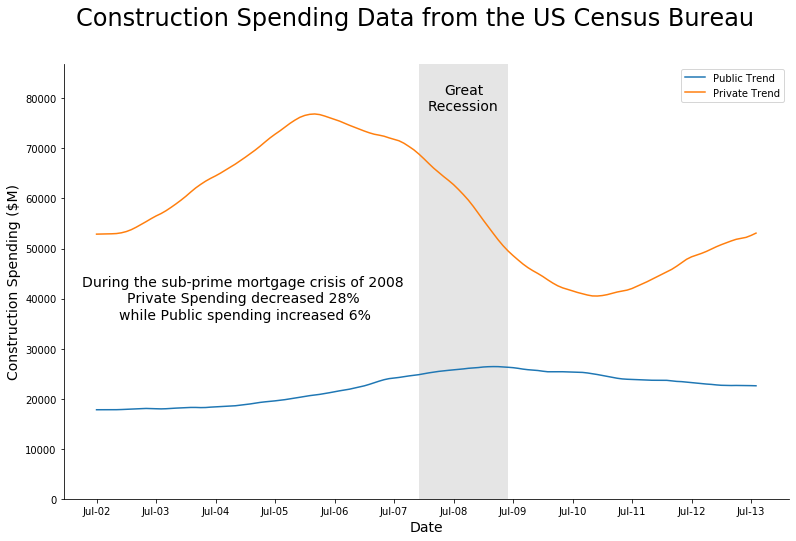

In [6]:
fig,ax = plt.subplots()

x = df['Month-Year']
y1 = df['MovAvgPublic']
y2 = df['MovAvgPrivate']

"""establish data to plot"""
ax.plot(x, y1, label='Public Trend')
ax.plot(x, y2, label='Private Trend')

"""Set Size and Title """
fig.set_size_inches(13,8)
fig.suptitle("Construction Spending Data from the US Census Bureau",fontsize='24')

"""Declutter"""
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

"""Add approproiate labels"""
ax.set_xlabel('Date',fontsize='14')
ax.set_ylabel('Construction Spending ($M)',fontsize='14')
ax.set_xticks(x[::12])
ax.set_xticklabels(x[::12])

"""Provide some upper space"""
ax.set_ylim(0,max(y2)+10000)

"""Add Legend or approproate descriptions"""
ax.legend()

"""Add descriptive features (Vertical Lines, Background Shading, Breaking Data into chunks, 
    Text embedded in graph, using color appropriately)"""

ax.axvspan(65,83,ymin=0,ymax = 300,facecolor='k',alpha=0.1)
ax.text(74,80000,'Great\nRecession',fontsize=14,verticalalignment='center',horizontalalignment='center')

ax.text(30,40000,'During the Great Recession \nPrivate Spending decreased 28% \nwhile Public spending increased 6%',fontsize=14,verticalalignment='center',horizontalalignment='center')

##Great Recession Time period December 2007 – June 2009 

"""Save high resolution figure"""
fig.savefig('M3Graphing.jpg',dpi=600)



## Describe the particular things you are calling out in the graph

The moving averages were used to provide trendlines to the public and private spending values. This data set include the Great Recession (also called the subprime mortgage crisis) from December 2007 through June of 2009. It was during this time period (and leading up to it) that public and private spending diverged. During the recession Private construction spending decreased and public spending increased. This was highlighted by shading the time period of the recession and adding a note in the graph with the percentage changes to spending during this time. 